In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/df_WOE.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,-0.653578,-0.987308,0.346995,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,0
1,0.991942,1.529823,0.065552,0.042559,-0.042225,0.701554,0.649822,0.668514,1
2,-0.653578,1.529823,-0.532753,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,1
3,0.991942,1.529823,0.065552,0.042559,-0.042225,0.701554,0.649822,-0.188350,1
4,-0.653578,-0.987308,0.065552,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    885 non-null    float64
 1   Sex       885 non-null    float64
 2   Age       885 non-null    float64
 3   SibSp     885 non-null    float64
 4   Parch     885 non-null    float64
 5   Fare      885 non-null    float64
 6   Cabin     885 non-null    float64
 7   Embarked  885 non-null    float64
 8   Survived  885 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 62.4 KB


In [7]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

In [8]:
df['Survived'] = df['Survived'].astype('category')

In [9]:
y = df['Survived']
X = df.drop('Survived',axis=1)

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
y_train

404    1
434    1
360    0
355    1
81     1
      ..
106    1
270    1
860    1
435    0
102    0
Name: Survived, Length: 708, dtype: category
Categories (2, int64): [0, 1]

In [12]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [13]:
# Features from RFE
#col = ['Sex', 'Age', 'SibSp', 'Cabin', 'Embarked']
#col = ['Pclass', 'Sex', 'Age','SibSp','Fare', 'Cabin', 'Embarked']
col = X_train.columns

In [14]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train[col], y_train)

RandomForestClassifier(random_state=0)

In [15]:
y_pred = rfc.predict(X_test[col])

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       113
           1       0.71      0.64      0.67        64

    accuracy                           0.77       177
   macro avg       0.76      0.75      0.75       177
weighted avg       0.77      0.77      0.77       177



In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[96, 17],
       [23, 41]])

In [18]:
n_folds = 5

In [19]:
# Max Depth
parameter = {'max_depth':range(6)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(0, 6)}, return_train_score=True)

In [20]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.164894,0.001340,0.012185,0.000059,3,{'max_depth': 3},0.809859,0.788732,0.859155,0.815603,...,0.820627,0.023353,1,0.835689,0.830389,0.818021,0.834215,0.823633,0.828389,0.006653
4,0.165288,0.001318,0.012409,0.000207,4,{'max_depth': 4},0.809859,0.795775,0.866197,0.794326,...,0.814934,0.026407,2,0.840989,0.837456,0.819788,0.846561,0.834215,0.835802,0.008993
5,0.167412,0.000519,0.012600,0.000173,5,{'max_depth': 5},0.802817,0.802817,0.859155,0.787234,...,0.813525,0.024523,3,0.848057,0.840989,0.832155,0.853616,0.848325,0.844628,0.007416
2,0.164200,0.000611,0.012257,0.000300,2,{'max_depth': 2},0.774648,0.788732,0.816901,0.787234,...,0.795205,0.015335,4,0.803887,0.796820,0.786219,0.807760,0.790123,0.796962,0.008084
1,0.164480,0.001997,0.012204,0.000141,1,{'max_depth': 1},0.760563,0.739437,0.809859,0.758865,...,0.774029,0.026988,5,0.802120,0.750883,0.789753,0.754850,0.790123,0.777546,0.020674
0,0.000693,0.000106,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


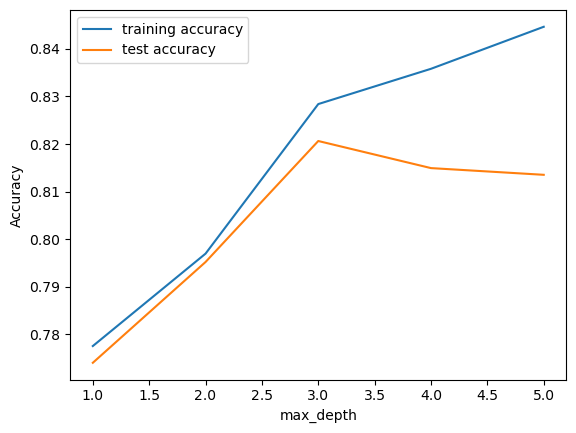

In [21]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [22]:
# max_depth = 4

In [23]:
# Number of Estimators
parameter = {'n_estimators':[100,500,1000,1500]}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 500, 1000, 1500]},
             return_train_score=True)

In [24]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.188698,0.011138,0.013802,0.000612,100,{'n_estimators': 100},0.760563,0.838028,0.873239,0.801418,...,0.816352,0.037691,1,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
3,2.651137,0.011603,0.197116,0.064872,1500,{'n_estimators': 1500},0.760563,0.830986,0.866197,0.801418,...,0.813535,0.034802,2,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
2,1.773732,0.013354,0.109849,0.001628,1000,{'n_estimators': 1000},0.767606,0.838028,0.873239,0.801418,...,0.813505,0.037716,3,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
1,0.888477,0.008940,0.055881,0.000587,500,{'n_estimators': 500},0.760563,0.845070,0.866197,0.794326,...,0.812097,0.038214,4,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204


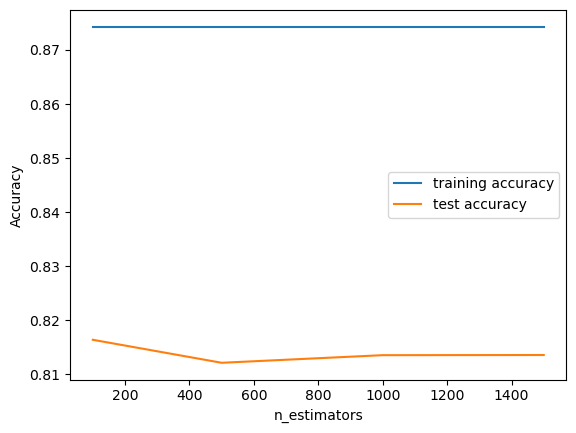

In [25]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [26]:
# n_estimators=1000

In [27]:
# Max Features
parameter = {'max_features':range(2,9,2)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(2, 9, 2)},
             return_train_score=True)

In [28]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.187492,0.001197,0.013308,0.000379,6,{'max_features': 6},0.760563,0.838028,0.873239,0.808511,...,0.817770,0.037233,1,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
0,0.182366,0.002917,0.013582,0.000409,2,{'max_features': 2},0.767606,0.838028,0.873239,0.801418,...,0.816342,0.036134,2,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
3,0.194184,0.001360,0.013107,0.000098,8,{'max_features': 8},0.760563,0.845070,0.845070,0.794326,...,0.807871,0.032780,3,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204
1,0.183364,0.001215,0.013592,0.000518,4,{'max_features': 4},0.753521,0.838028,0.866197,0.794326,...,0.807861,0.039685,4,0.881625,0.871025,0.863958,0.876543,0.878307,0.874292,0.006204


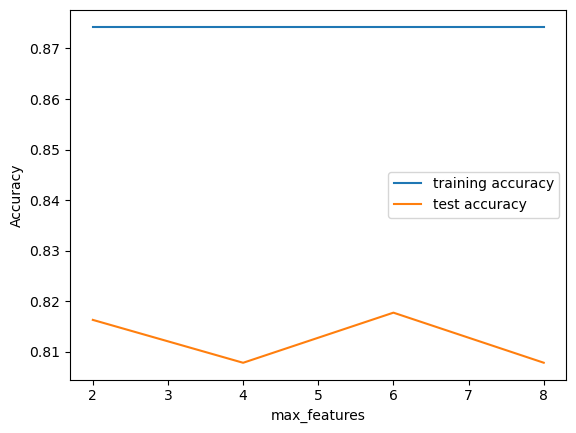

In [29]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [30]:
# max_features=6

In [31]:
# Min Samples Leaf
parameter = {'min_samples_leaf':range(2,20,2)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(2, 20, 2)},
             return_train_score=True)

In [32]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,0.167430,0.001095,0.012738,0.000706,18,{'min_samples_leaf': 18},0.816901,0.802817,0.859155,0.808511,...,0.823434,0.020034,1,0.828622,0.832155,0.812721,0.823633,0.816578,0.822742,0.007244
6,0.167949,0.001360,0.012358,0.000101,14,{'min_samples_leaf': 14},0.802817,0.795775,0.859155,0.808511,...,0.819209,0.022978,2,0.825088,0.833922,0.818021,0.825397,0.825397,0.825565,0.005041
5,0.167956,0.000831,0.012614,0.000224,12,{'min_samples_leaf': 12},0.809859,0.788732,0.859155,0.822695,...,0.819209,0.022966,3,0.826855,0.830389,0.819788,0.827160,0.832451,0.827329,0.004306
4,0.171789,0.006828,0.013145,0.001315,10,{'min_samples_leaf': 10},0.809859,0.802817,0.852113,0.808511,...,0.819199,0.017694,4,0.828622,0.828622,0.814488,0.830688,0.823633,0.825210,0.005844
7,0.166463,0.000851,0.012494,0.000193,16,{'min_samples_leaf': 16},0.802817,0.802817,0.859155,0.808511,...,0.819199,0.021259,4,0.825088,0.832155,0.818021,0.823633,0.821869,0.824154,0.004648
2,0.170617,0.001305,0.012704,0.000098,6,{'min_samples_leaf': 6},0.802817,0.795775,0.859155,0.794326,...,0.813535,0.024020,6,0.837456,0.832155,0.823322,0.837743,0.841270,0.834389,0.006253
3,0.170222,0.000904,0.012817,0.000196,8,{'min_samples_leaf': 8},0.795775,0.795775,0.866197,0.794326,...,0.813535,0.027486,6,0.832155,0.830389,0.821555,0.837743,0.830688,0.830506,0.005201
0,0.174582,0.001727,0.012899,0.000113,2,{'min_samples_leaf': 2},0.781690,0.809859,0.873239,0.794326,...,0.813525,0.031580,8,0.862191,0.851590,0.848057,0.862434,0.862434,0.857341,0.006240
1,0.172231,0.002816,0.012899,0.000284,4,{'min_samples_leaf': 4},0.795775,0.795775,0.866197,0.787234,...,0.809280,0.028817,9,0.849823,0.833922,0.832155,0.848325,0.841270,0.841099,0.007209


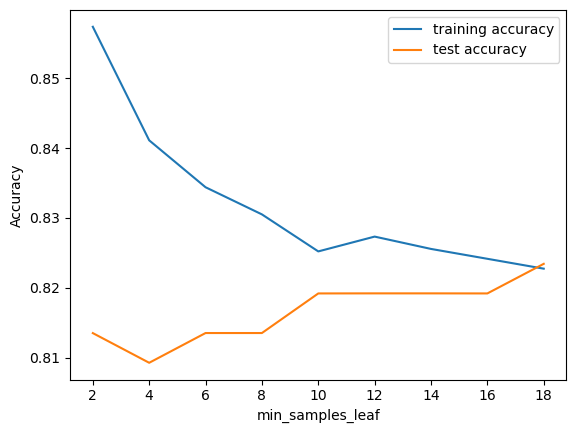

In [33]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# min_samples_leaf = 16

In [35]:
# Min Samples Split
parameter = {'min_samples_split':range(30,60,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(30, 60, 5)},
             return_train_score=True)

In [36]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.168624,0.001015,0.012536,0.000061,50,{'min_samples_split': 50},0.788732,0.795775,0.859155,0.815603,...,0.814974,0.024536,1,0.835689,0.833922,0.826855,0.827160,0.832451,0.831216,0.003587
2,0.168861,0.001138,0.012820,0.000285,40,{'min_samples_split': 40},0.802817,0.795775,0.852113,0.815603,...,0.814964,0.019687,2,0.833922,0.835689,0.821555,0.837743,0.839506,0.833683,0.006349
5,0.171395,0.005294,0.013562,0.001613,55,{'min_samples_split': 55},0.809859,0.795775,0.852113,0.815603,...,0.814954,0.019790,3,0.830389,0.835689,0.821555,0.830688,0.828924,0.829449,0.004560
3,0.168035,0.000342,0.012606,0.000259,45,{'min_samples_split': 45},0.795775,0.795775,0.852113,0.808511,...,0.812137,0.020784,4,0.839223,0.830389,0.830389,0.835979,0.834215,0.834039,0.003386
0,0.171046,0.001871,0.012672,0.000095,30,{'min_samples_split': 30},0.802817,0.809859,0.859155,0.794326,...,0.812097,0.024237,5,0.844523,0.835689,0.830389,0.848325,0.841270,0.840039,0.006361
1,0.169185,0.000681,0.012670,0.000109,35,{'min_samples_split': 35},0.788732,0.795775,0.859155,0.808511,...,0.806463,0.027936,6,0.844523,0.835689,0.826855,0.841270,0.841270,0.837921,0.006220


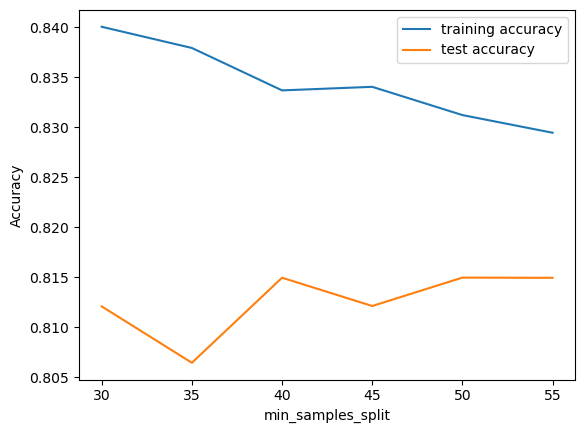

In [37]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# min_samples_split = 45

In [39]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,4],
    'min_samples_leaf': [14,16],
    'min_samples_split': [45,50],
    'n_estimators': [500, 1000], 
    'max_features': [5,6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'max_features': [5, 6],
                         'min_samples_leaf': [14, 16],
                         'min_samples_split': [45, 50],
                         'n_estimators': [500, 1000]},
             return_train_score=True, verbose=1)

In [40]:
scores = pd.DataFrame(grid_search.cv_results_)
scores.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
31,2.309844,0.403412,0.159779,0.036487,4,6,16,50,1000,"{'max_depth': 4, 'max_features': 6, 'min_sampl...",...,0.855932,0.809322,0.823446,0.023036,1,0.832627,0.811441,0.830508,0.824859,0.009527
16,1.358843,0.019084,0.096938,0.001847,4,5,14,45,500,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",...,0.855932,0.809322,0.823446,0.023036,1,0.832627,0.809322,0.830508,0.824153,0.010522
24,1.424786,0.104215,0.093572,0.003008,4,6,14,45,500,"{'max_depth': 4, 'max_features': 6, 'min_sampl...",...,0.855932,0.809322,0.823446,0.023036,1,0.832627,0.811441,0.830508,0.824859,0.009527
20,1.293358,0.006977,0.094827,0.000980,4,5,16,45,500,"{'max_depth': 4, 'max_features': 5, 'min_sampl...",...,0.855932,0.809322,0.823446,0.023036,1,0.832627,0.811441,0.830508,0.824859,0.009527
13,2.597709,0.006240,0.191981,0.002548,3,6,16,45,1000,"{'max_depth': 3, 'max_features': 6, 'min_sampl...",...,0.855932,0.809322,0.823446,0.023036,1,0.832627,0.807203,0.830508,0.823446,0.011518


In [41]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=14,
                       min_samples_split=45, n_estimators=1000)

In [42]:
rfc_final = RandomForestClassifier(bootstrap=True,
                                   max_depth=3, 
                                   max_features=5, 
                                   min_samples_leaf=14,
                                   min_samples_split=50, 
                                   n_estimators=1000)

In [43]:
rfc.fit(X,y)

RandomForestClassifier(random_state=0)

In [44]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [45]:
test_path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/Test_WOE.csv'

In [46]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,-0.668306,"Kelly, Mr. James",-0.983517,0.054371,0.043481,-0.040032,330911,-0.92705,1.610899,0.022514
1,893,-0.668306,"Wilkes, Mrs. James (Ellen Needs)",1.528054,0.054371,0.043481,-0.040032,363272,-0.92705,1.610899,-0.193903
2,894,0.362662,"Myles, Mr. Thomas Francis",-0.983517,0.054371,0.043481,-0.040032,240276,0.07756,0.301566,0.022514
3,895,-0.668306,"Wirz, Mr. Albert",-0.983517,-0.405875,0.043481,-0.040032,315154,-0.92705,1.610899,-0.193903
4,896,-0.668306,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.528054,0.324534,0.043481,-0.040032,3101298,0.07756,1.610899,-0.193903


In [47]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [49]:
test[test['Parch'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
y_pred = rfc.predict_proba(test[X.columns])

In [51]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1
0,0.500000,0.500000
1,0.446307,0.553693
2,0.956144,0.043856
3,0.203876,0.796124
4,0.144123,0.855877
...,...,...
413,0.203876,0.796124
414,0.088027,0.911973
415,0.378521,0.621479
416,0.203876,0.796124


In [52]:
y_pred_1 = y_pred_df.iloc[:,1]
pred_1_df = pd.DataFrame(y_pred_1)
pred_1_df.head()

,1
0,0.500000
1,0.553693
2,0.043856
3,0.796124
4,0.855877


In [53]:
test_pred = pd.concat([test['PassengerId'], pred_1_df], 1)
test_pred['Survived'] = test_pred.loc[:,1].map(lambda x:1 if x>0.5 else 0)
test_pred.head()

,PassengerId,1,Survived
0,892,0.500000,0
1,893,0.553693,1
2,894,0.043856,0
3,895,0.796124,1
4,896,0.855877,1


In [54]:
test_pred = test_pred.drop(1, axis=1)
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1


In [55]:
test_pred.to_csv('RF_0.7.csv', index=False)